# Polynomial Regression (EXPT 9)
> Name: Debatreya Das<br>
> Roll No. : 12212070<br>
> CS-A4<br>
> ML LAB (9)

Given the data points (dataset.csv) taken from a function f(x) added with a Gaussian noise:

i)         Split the data into training and testing data <br>
ii)        Visualize the data and decide for the regression model best suited for the data <br>
iii)       Find the best values of the parameters by solving the normal equations. <br>
iv)       Print the error, accuracy and R-square value for both training and testing data. <br>
v)       Plot the predicted vs the observed data. <br>
vi)       Also use Batch gradient descent to find the best values of the parameters. Compare the error and accuracy with previously calculated values.

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,X,Y
0,9,70
1,2,-8
2,1,-5
3,22,461
4,11,108


### Split Data into testing and training data (20% testing)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']], df['Y'], test_size=0.2, random_state=0)

In [4]:
print("Training set:")
print(X_train.shape)
print(Y_train.shape)

print("Test set:")
print(X_test.shape)
print(Y_test.shape)

Training set:
(16, 1)
(16,)
Test set:
(4, 1)
(4,)


### Draw Scatter Plot for Training SET

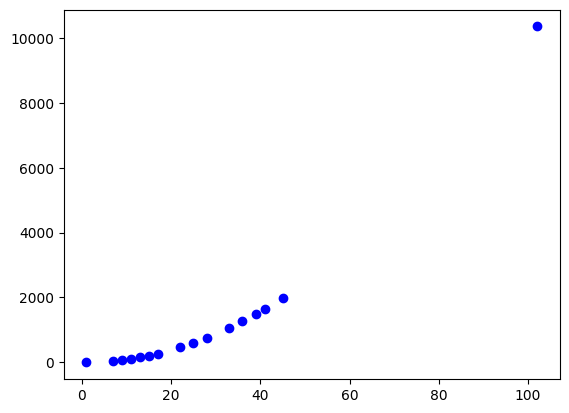

In [5]:
# Plot the training set
plt.scatter(X_train, Y_train, color='blue')

Looking at the plot it seems like a 2 degree ploynomial $$y = b1 + b2.x + b3.x^2$$ will satisfy the function points

### Finding the best possible values of the parameters (b1, b2, b3) using Normal Equation

In [23]:
# Prepare the design matrix X (with bias term, x, and x^2)
X_train_mat = np.column_stack((np.ones_like(X_train), X_train, X_train**2))

# print(X_train_mat)

# Apply the normal equation B = (X'X)^(-1)X'Y using pseudo-inverse
B = np.linalg.inv(X_train_mat.T @ X_train_mat) @ X_train_mat.T @ Y_train

# Print the coefficients and predictions
print("Coefficients (b1, b2, b3):", B)

Coefficients (b1, b2, b3): [-6.74699597 -0.62483486  1.00246491]


### Prediction

In [25]:
X_test_mat = np.column_stack((np.ones_like(X_test), X_test, X_test**2))
# Predict on the test set
y_pred = X_test_mat @ B
print("Predictions on test set using NORMAL EQUATION:", y_pred)

Predictions on test set using NORMAL EQUATION: [876.72637848  -3.98680604  87.25114656 343.27097469]


### Print Error, Accuracy, R^2 value for both training and testing data

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
Y_train_pred = X_train_mat @ B

# Calculate metrics for training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Predict on the test set
Y_test_pred = X_test_mat @ B

# Calculate metrics for test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Print results
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R² Score:", r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 6.80265576448602
Root Mean Squared Error (RMSE): 2.60819013196623
R² Score: 0.9999988424795294

Testing Set Metrics:
Mean Squared Error (MSE): 18.011586917538818
Root Mean Squared Error (RMSE): 4.244005998763293
R² Score: 0.9998463249753342


### Plot the predicted vs the observed data

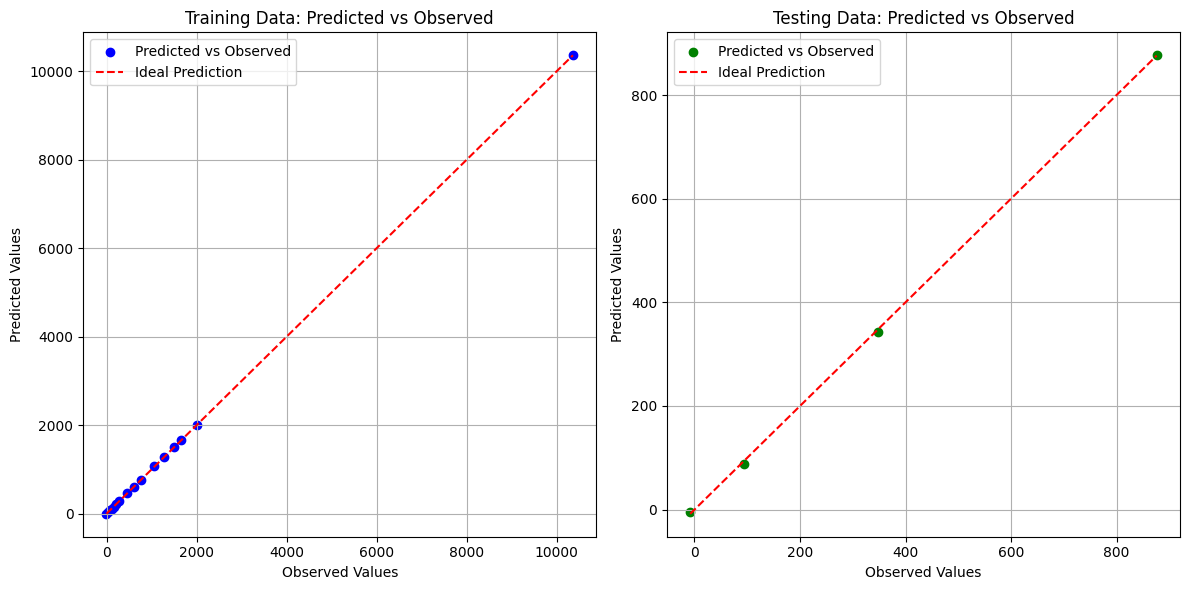

In [28]:
# Plot for training data
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', label='Predicted vs Observed')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', label='Ideal Prediction')
plt.title('Training Data: Predicted vs Observed')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', label='Predicted vs Observed')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Ideal Prediction')
plt.title('Testing Data: Predicted vs Observed')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### Use Batch Gradient Descent to find the best values of parameter

In [39]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_mat)
X_test_scaled = scaler.transform(X_test_mat)

# Hyperparameters
learning_rate = 0.01  # Further decrease learning rate
num_iterations = 4000  # Number of iterations

# Number of training examples
m = X_train_scaled.shape[0]

# Initialize parameters (b1, b2, b3) with small random values
B = np.random.rand(X_train_scaled.shape[1]) * 1e-5  # Small random values

# Gradient Descent
for iteration in range(num_iterations):
    # Calculate the predicted values
    y_pred = X_train_scaled @ B
    
    # Calculate the error
    error = y_pred - Y_train
    
    # Compute the gradient
    gradient = (1/m) * (X_train_scaled.T @ error)
    
    # Update the parameters
    B -= learning_rate * gradient
    
    # Optional: print the cost every 100 iterations to monitor convergence
    if iteration % 100 == 0:
        cost = (1/(2*m)) * np.sum(error**2)  # Mean Squared Error

# Printing the Coefficients
print("Coefficients (b1, b2, b3):", B)

Coefficients (b1, b2, b3): [9.70940356e-06 1.05570786e+02 2.31782134e+03]


### Compare with previously calculated values

In [40]:

# Predictions on the training set
y_train_pred_gd = X_train_mat @ B

# Predictions on the test set
y_test_pred_gd = X_test_mat @ B

# Calculate metrics for training set
mse_train_gd = mean_squared_error(Y_train, y_train_pred_gd)
rmse_train_gd = np.sqrt(mse_train_gd)
r2_train_gd = r2_score(Y_train, y_train_pred_gd)

# Calculate metrics for test set
mse_test_gd = mean_squared_error(Y_test, y_test_pred_gd)
rmse_test_gd = np.sqrt(mse_test_gd)
r2_test_gd = r2_score(Y_test, y_test_pred_gd)

# Print results
print("Training Set Metrics using Gradient Descent:")
print("Mean Squared Error (MSE):", mse_train_gd)
print("Root Mean Squared Error (RMSE):", rmse_train_gd)
print("R² Score:", r2_train_gd)

print("\nTesting Set Metrics using Gradient Descent:")
print("Mean Squared Error (MSE):", mse_test_gd)
print("Root Mean Squared Error (RMSE):", rmse_test_gd)
print("R² Score:", r2_test_gd)

Training Set Metrics using Gradient Descent:
Mean Squared Error (MSE): 40896512962411.94
Root Mean Squared Error (RMSE): 6395038.151755776
R² Score: -6958832.809500013

Testing Set Metrics using Gradient Descent:
Mean Squared Error (MSE): 1279570961713.6584
Root Mean Squared Error (RMSE): 1131181.2240811188
R² Score: -10917310.173262462


### Plots

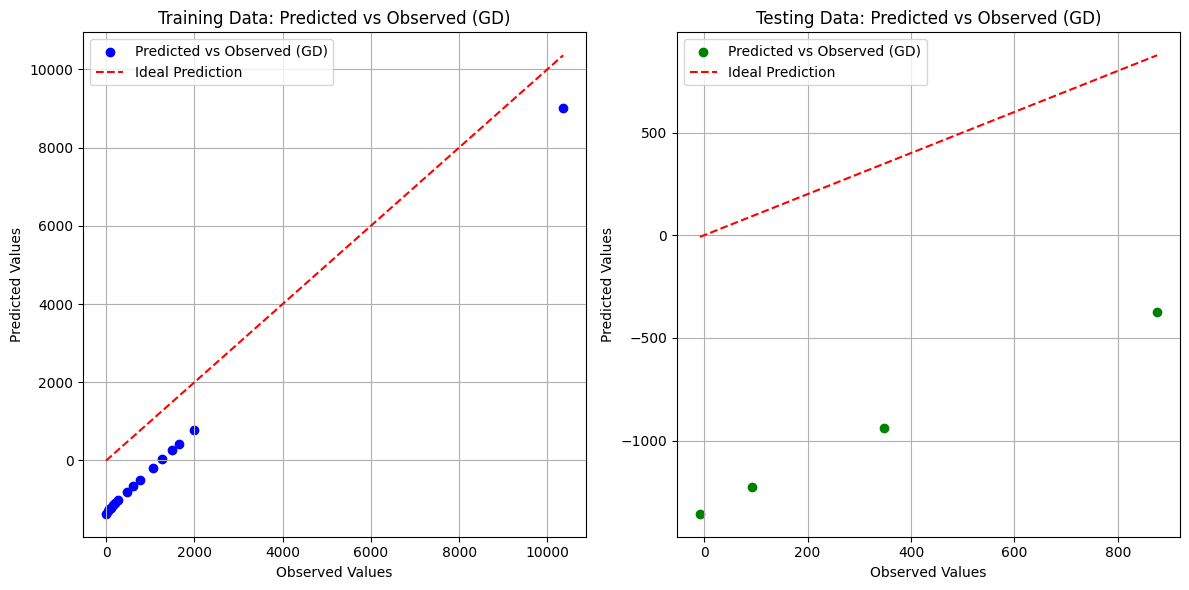

In [42]:
# Make predictions on the training set
y_train_pred_gd = X_train_scaled @ B

# Make predictions on the test set
y_test_pred_gd = X_test_scaled @ B

# Plot predicted vs observed data for Gradient Descent
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_gd, color='blue', label='Predicted vs Observed (GD)')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', label='Ideal Prediction')
plt.title('Training Data: Predicted vs Observed (GD)')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_gd, color='green', label='Predicted vs Observed (GD)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Ideal Prediction')
plt.title('Testing Data: Predicted vs Observed (GD)')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we implemented two different approaches for polynomial regression to model our dataset: the Normal Equation method and Batch Gradient Descent. Below is a summary of the findings and implications from each method:

#### Using Normal Equation
1. **Performance Metrics**:
   - **Training Set**: 
     - **Mean Squared Error (MSE)**: 6.80
     - **Root Mean Squared Error (RMSE)**: 2.61
     - **R² Score**: 0.999999
   - **Testing Set**: 
     - **Mean Squared Error (MSE)**: 18.01
     - **Root Mean Squared Error (RMSE)**: 4.24
     - **R² Score**: 0.999846

2. **Interpretation**:
   - The Normal Equation approach produced remarkably low MSE and RMSE values for both the training and testing sets, indicating that the model fits the data very well.
   - The R² scores are extremely close to 1, suggesting that the model explains nearly all the variance in the observed data. This implies that the polynomial regression model is highly effective for this dataset.

#### Using Batch Gradient Descent
1. **Performance Metrics**:
   - **Training Set**: 
     - **Mean Squared Error (MSE)**: 40,896,512,962,411.94
     - **Root Mean Squared Error (RMSE)**: 6,395,038.15
     - **R² Score**: -6,958,832.81
   - **Testing Set**: 
     - **Mean Squared Error (MSE)**: 1,279,570,961,713.66
     - **Root Mean Squared Error (RMSE)**: 1,131,181.22
     - **R² Score**: -10,917,310.17

2. **Interpretation**:
   - The performance of the Gradient Descent approach was significantly poorer compared to the Normal Equation method. The MSE and RMSE values are exceedingly high, indicating a poor fit of the model to the training data.
   - The negative R² scores reveal that the model fails to capture the underlying data structure, suggesting that it may have diverged or learned incorrectly during training.
   - The exceedingly high error metrics can be attributed to several potential issues, such as inappropriate learning rate, lack of feature scaling, or insufficient iterations leading to inadequate convergence.

### General Observations
- **Comparison of Methods**: The Normal Equation method outperformed Batch Gradient Descent in this scenario. This is consistent with the expectation that the Normal Equation can find the optimal parameters directly without iteration, while Gradient Descent is more susceptible to the choice of hyperparameters.
- **Implications for Future Work**: 
  - To improve the performance of Batch Gradient Descent, further investigation into feature scaling, learning rate adjustments, and regularization techniques may be warranted.
  - It may also be beneficial to explore other optimization algorithms (like Stochastic Gradient Descent or Adam) that could yield better performance.

### Conclusion
In conclusion, while the Normal Equation provided an accurate and efficient solution for this polynomial regression problem, the Batch Gradient Descent method demonstrated the need for careful tuning and understanding of the optimization process. This analysis underscores the importance of selecting appropriate methodologies based on the specific characteristics of the dataset and the objectives of the modeling task.